참고 :

* https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/keras/classification.ipynb  
* https://archive.is/fY0FO

In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

* 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. 레이블(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 클래스(class)를 나타냅니다:
* 레이블 클래스
0   T-shirt/top  
1   Trouser  
2   Pullover  
3   Dress  
4   Coat  
5   Sandal  
6   Shirt  
7   Sneaker  
8   Bag  
9   Ankle boot  

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

## 데이터 탐색

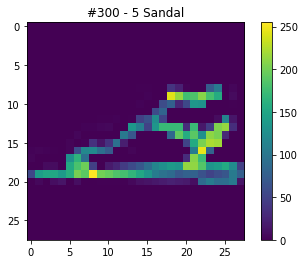

In [5]:
plt.figure()
idx_to_draw = 300 # 바꾸어보세요
plt.imshow(train_images[idx_to_draw])

lbl = train_labels[idx_to_draw]

plt.title('#{} - {} {}'.format(idx_to_draw, lbl, class_names[lbl]))
plt.colorbar()
plt.grid(False)
plt.show()

## Data 전처리

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다. 이렇게 하려면 255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다:

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

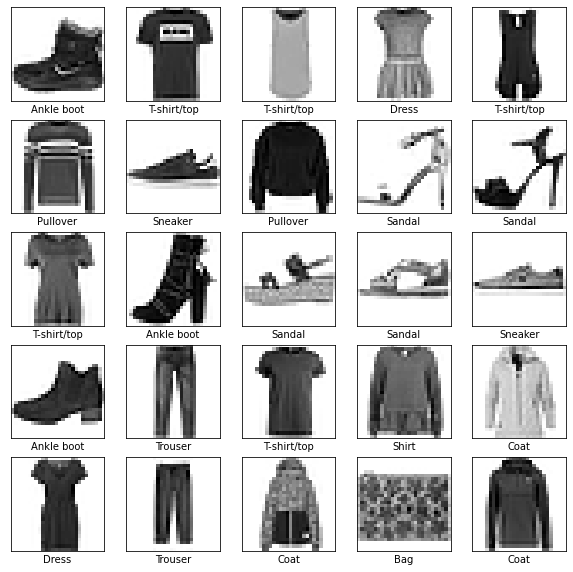

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

### 층설정

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### 모델 컴파일

* 손실 함수(Loss function)-훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.
* 옵티마이저(Optimizer)-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.
* 지표(Metrics)-훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 모델 훈련

In [10]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 417us/step - loss: 0.4979 - accuracy: 0.8257
Epoch 2/5
1875/1875 [==============================] - 1s 440us/step - loss: 0.3707 - accuracy: 0.8669
Epoch 3/5
1875/1875 [==============================] - 1s 440us/step - loss: 0.3335 - accuracy: 0.8780
Epoch 4/5
1875/1875 [==============================] - 1s 438us/step - loss: 0.3113 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 1s 440us/step - loss: 0.2912 - accuracy: 0.8924


### 정확도 평가

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3686 - accuracy: 0.8660

테스트 정확도: 0.8659999966621399


### 예측 만들기

In [12]:
predictions = model.predict(test_images)

In [13]:
predictions[4]

array([5.4722100e-02, 1.8485198e-05, 5.4838840e-02, 1.6453969e-03,
       6.4728949e-03, 8.6706939e-07, 8.8204944e-01, 2.3353152e-07,
       2.5091952e-04, 7.1787076e-07], dtype=float32)

In [14]:
np.argmax(predictions[4])

6

In [15]:
test_labels[4]

6

In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인해 보겠습니다.

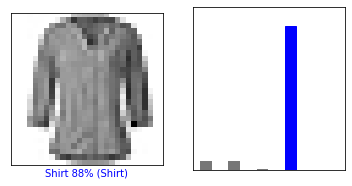

In [17]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

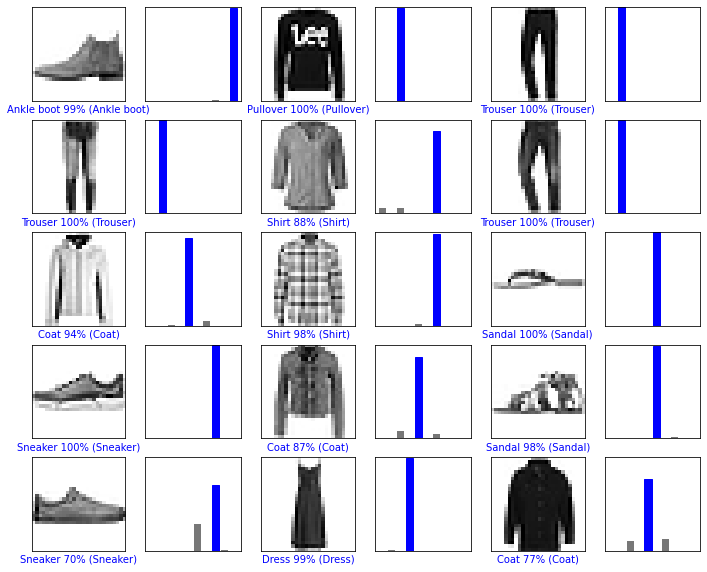

In [18]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측하기.

In [19]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[4]

print(img.shape)

(28, 28)


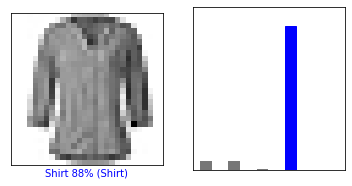

In [20]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있습니다. 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다:

In [21]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [22]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.4722063e-02 1.8485203e-05 5.4838788e-02 1.6453974e-03 6.4728935e-03
  8.6706962e-07 8.8204968e-01 2.3353159e-07 2.5091958e-04 7.1787372e-07]]


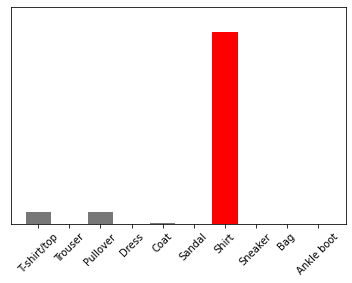

In [23]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [24]:
np.argmax(predictions_single[0])

6

클래스 6 셔츠가 가장 높은 것! 잘 분류하는 것을 볼 수 있다.